# Data analysis and preprocessing

The aim of this notebook is to first analyze the dataset provided and then, based on this analysis, do the processing of it.

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re

In [2]:
data_path = 'path/to/preprocessed/data/folder'

First, we load the tweets

In [3]:
tweets = []
labels = []

def load_tweets(filename, label):
    with open(filename, 'r', encoding='utf-8') as f:
        for line in f:
            tweets.append(line.rstrip())
            labels.append(label)
    
load_tweets(data_path + 'train_neg_full.txt', 0)
load_tweets(data_path + 'train_pos_full.txt', 1)

# Convert to NumPy array to facilitate indexing
tweets = np.array(tweets)
labels = np.array(labels)

print(f'{len(tweets)} tweets loaded')

2500000 tweets loaded


In [4]:
train = pd.DataFrame({'tweet':tweets, 'label':labels})


# 1. Is the dataset balanced?

Tweets with negative sentiment: 1250000
Tweets with positive sentiment: 1250000


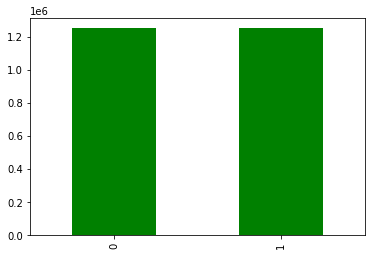

In [5]:
train['label'].value_counts().plot.bar(color = 'green', figsize = (6, 4))
print('Tweets with negative sentiment: '+str(train['label'].value_counts()[0]))
print('Tweets with positive sentiment: '+str(train['label'].value_counts()[1]))

Yes, the dataset is perfectly balanced

# 2. How long are the tweets?

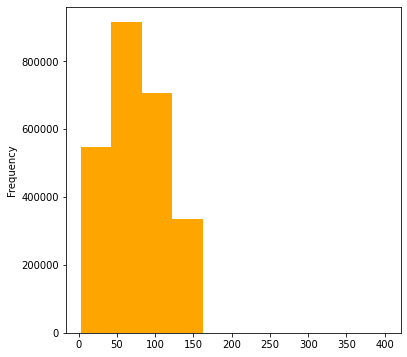

In [6]:
length_train = train['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 6))

In [7]:
train['tweet'].str.len().describe()

count    2.500000e+06
mean     7.596408e+01
std      3.542579e+01
min      3.000000e+00
25%      4.600000e+01
50%      7.100000e+01
75%      1.110000e+02
max      4.010000e+02
Name: tweet, dtype: float64

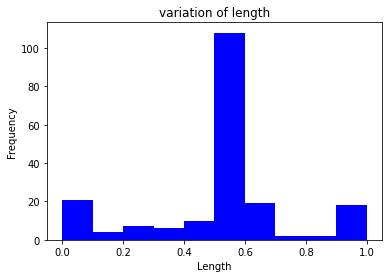

In [8]:
train['len'] = train['tweet'].str.len()
train.groupby('len').mean()['label'].plot.hist(color = 'blue', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

How does the length variates in positive and negative tweets?

In [9]:
train.groupby('label').describe()

len                                                     
           count       mean        std  min   25%   50%    75%    max
label                                                                
0      1250000.0  84.092398  36.381782  3.0  51.0  85.0  122.0  323.0
1      1250000.0  67.835752  32.468458  5.0  42.0  63.0   92.0  401.0

# 3. Are there any duplicates?

In [10]:
duplicated = train.groupby(['tweet', 'label']).size().reset_index(name='counts')
duplicated.sort_values('counts', ascending = False).head(20)

,tweet,label,counts
866045,<user> thanks,1,3094
321342,<user> can't wait to see you,0,2007
2048875,thank you very much everyone night night to alll,1,1641
1493097,i love our fans ! there all so beautiful ! x <...,1,1536
1326261,"girlfriend : babe , whats your favorite positi...",1,621
1648601,just reading lots of peoples bios you guys are...,1,582
469175,<user> how are you ? please follow sexy <user> x,1,571
873620,<user> thanks for the follow,1,551
364263,<user> follow back please ?,1,536
369179,<user> for saying that ' i smell ' you have to...,1,533


In [11]:
len(duplicated)

2270482

There are 2.270.482 unique pairs <tweet,label>, thus there are 2.500.000 - 2.270.482 = 229.518 duplicates

# 4. Which are the most common words?

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

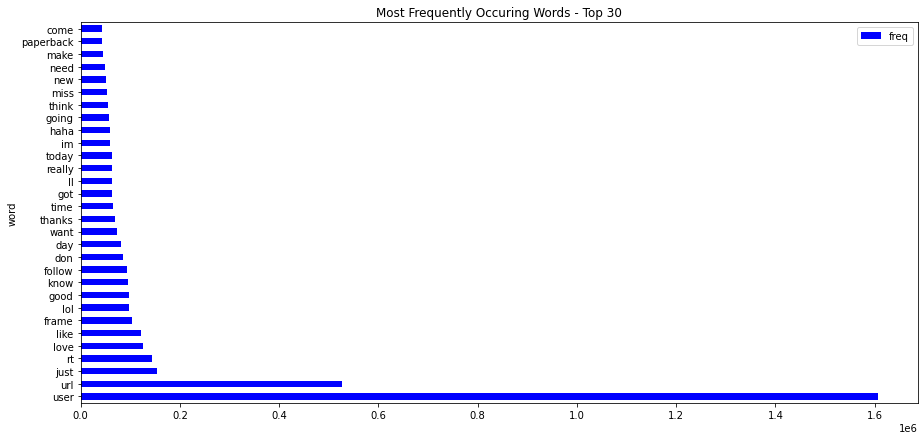

In [12]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='barh', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'Most Frequently Neg Occuring Words - Top 30')

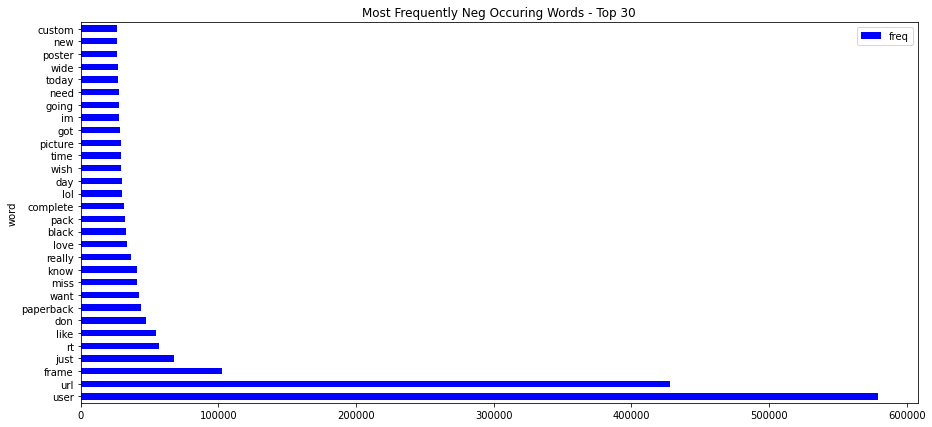

In [13]:
words = cv.fit_transform(train[train['label']==0].tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='barh', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Neg Occuring Words - Top 30")

Text(0.5, 1.0, 'Most Frequently Pos Occuring Words - Top 30')

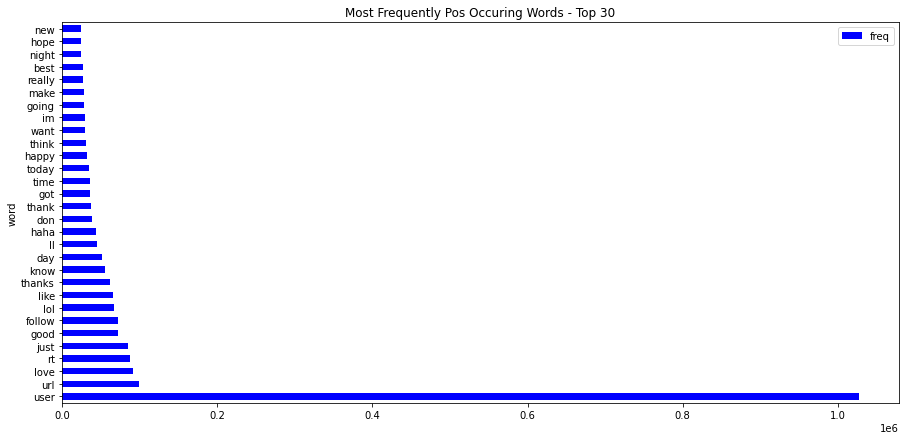

In [14]:
words = cv.fit_transform(train[train['label']==1].tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='barh', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Pos Occuring Words - Top 30")

# 5. How many tweets contain hastags?
We want to analyze now the percentage of hashtags among the tweets, to understand whether it could be significant to process them

In [15]:
sentences_with_hashtag = 0
num_of_hashtags = 0
for tweet in train['tweet']:
    hashtags = re.findall(r"#(\w+)", tweet)
    if(hashtags):
        sentences_with_hashtag = sentences_with_hashtag + 1
        num_of_hashtags = num_of_hashtags + len(hashtags)
print('Percentage of tweets containing hashtags: '+ "{:.2f}".format(sentences_with_hashtag/train.shape[0]*100)+ '%')
print('Mean number of hashtags per tweet: '+ "{:.2f}".format(num_of_hashtags/train.shape[0]))

Percentage of tweets containing hashtags: 11.43%
Mean number of hashtags per tweet: 0.14


# 6. How many tweets contain retweet?

In [16]:
sentences_with_retweet = 0
for tweet in train['tweet']:
    if("rt \"" in tweet):
        sentences_with_retweet = sentences_with_retweet + 1
print('Percentage of tweets containing retweets: '+ "{:.2f}".format(sentences_with_retweet/train.shape[0]*100)+ '%')
print('Number of tweets containing retweets: '+ str(sentences_with_retweet))

Percentage of tweets containing retweets: 0.21%
Number of tweets containing retweets: 5265


# 7. How many tweets contain near duplicates?
As suggested by [Go & al.](https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) it is important to remove duplicates in order to avoid putting extra weight on any particular tweet. 

In [17]:
len(train.drop_duplicates())

2270482

In [18]:
no_near_dup_train = train.loc[train['tweet'].shift(-1) != train['tweet']]

In [19]:
len(no_near_dup_train)

2270482

We notice that all the duplicates are in fact near to each other. However, this is not enough to yield a conclusion, since no information is provided about the ordering of the data

In [20]:
group_by_tweet = train.groupby(['tweet']).size().reset_index(name='counts')

In [21]:
duplicated.sort_values('tweet', ascending = False).sort_values('counts', ascending = False).head(10)

,tweet,label,counts
866045,<user> thanks,1,3094
321342,<user> can't wait to see you,0,2007
2048875,thank you very much everyone night night to alll,1,1641
1493097,i love our fans ! there all so beautiful ! x <...,1,1536
1326261,"girlfriend : babe , whats your favorite positi...",1,621
1648601,just reading lots of peoples bios you guys are...,1,582
469175,<user> how are you ? please follow sexy <user> x,1,571
873620,<user> thanks for the follow,1,551
364263,<user> follow back please ?,1,536
369179,<user> for saying that ' i smell ' you have to...,1,533


In [22]:
duplicated = train.groupby(['tweet', 'label']).size().reset_index(name='counts')

In [24]:
duplicated[duplicated['tweet']=='<user> can\'t wait to see you']

,tweet,label,counts
321342,<user> can't wait to see you,0,2007
321343,<user> can't wait to see you,1,11


We delete tweets with the same tweet and count since they will have different label.

In [25]:
no_diff_label = duplicated.drop_duplicates(['tweet','counts'], keep=False)

In [26]:
print(str(len(no_diff_label))+' tweets remaining')

2268820 tweets remaining


Remove all the duplicates, keeping the one with more occurrences

In [27]:
no_dup_diff_label = no_diff_label.drop_duplicates(['tweet'], keep = 'first')

In [28]:
print(str(len(no_dup_diff_label))+' tweets remaining')

2267760 tweets remaining
